# **Дипломная работа «Анализ данных Олимпийских игр (поиск инсайтов, составление рекомендаций стейкхолдерам)**

In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [17]:
# датасет с био
bio = pd.read_csv('Olympic_Athlete_Bio.csv', na_values = 'na')
bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN


In [18]:
# необходимо изменить формат данных для веса и даты рождения
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155861 non-null  int64  
 1   name           155861 non-null  object 
 2   sex            155861 non-null  object 
 3   born           151808 non-null  object 
 4   height         105112 non-null  float64
 5   weight         105112 non-null  object 
 6   country        155861 non-null  object 
 7   country_noc    155861 non-null  object 
 8   description    54863 non-null   object 
 9   special_notes  60637 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.9+ MB


*   id - Уникальный идентификатор спортсмена
*   name - Имя и фамилия спортсмена
*   sex - Пол спортсмена: Male или Female
*   born - Полная дата рождения
*   height - Рост спортсмена
*   weight - Исходное значение веса
*   country - Страна, которую представляет спортсмен       
*   country_noc - Код страны
*   description — Описание
*   special_notes — Специальные примечания

Присутствуют пропуски, особенно в height, weight и born, что требует предобработки.












In [5]:
# датасет с результатами игр
results_event = pd.read_csv('Olympic_Athlete_Event_Results.csv', na_values=['na'])
results_event.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False


In [6]:
results_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316834 entries, 0 to 316833
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316834 non-null  object
 1   edition_id   316834 non-null  int64 
 2   country_noc  316834 non-null  object
 3   sport        316834 non-null  object
 4   event        316834 non-null  object
 5   result_id    316834 non-null  int64 
 6   athlete      316834 non-null  object
 7   athlete_id   316834 non-null  int64 
 8   pos          316834 non-null  object
 9   medal        44687 non-null   object
 10  isTeamSport  316834 non-null  bool  
dtypes: bool(1), int64(3), object(7)
memory usage: 24.5+ MB


 Загружены результаты выступлений спортсменов. Этот датасет нужен для анализа событий, достижений и результатов в конкретных дисциплинах.

*   sport - Название дисциплины
*   event - Название спортивного события  
*   athlete - Имя спортсмена
*   athlete_id - Идентификатор спортсмена
  

In [7]:
# датасет с деталями результатов №2 - для целей нашего исследования не нужен
o_results = pd.read_csv('Olympic_Results.csv', na_values=['na'])
o_results.head()

,result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
0,30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,/editions/26/sports/WLF,"25 August 2004 — 16:30 (B), 20:00 (A)","Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,Total of best lifts in snatch and clean & jerk...,NaN,"Not so much a competition as a coronation, the..."
1,1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,/editions/46/sports/SBD,9 February 1998,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,"Two runs, total time determined placement.",Gates: 38 / 36Length: 936 mStart Altitude: 196...,The women’s giant slalom was postponed one day...
2,76,"Singles, Men",1976 Winter Olympics,40,Luge,/editions/40/sports/LUG,4 – 7 February 1976,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,"Four runs, total time determined placement.",Curves: 14Length: 1220 mStart Altitude: ?Verti...,"Once more, the competitors from East and West ..."
3,962,"1,500 metres, Men",1928 Winter Olympics,30,Speed Skating,/editions/30/sports/SSK,14 February 1928 — 9:00,"Olympia-Eisstadion Badrutts Park, St. Moritz",30 from 14 countries,NaN,NaN,There was little doubt that the Olympic 1500 m...
4,258824,"Canadian Singles, Slalom, Men",2008 Summer Olympics,53,Canoe Slalom,/editions/53/sports/CSL,11 – 12 August 2008,"Shunyi Aolinpike Shuishang Gongyuan, Mapo, Shunyi",16 from 16 countries,NaN,NaN,Two former Olympic champions in the C-1 slalom...


In [8]:
o_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   result_id            7394 non-null   int64 
 1   event_title          7394 non-null   object
 2   edition              7394 non-null   object
 3   edition_id           7394 non-null   int64 
 4   sport                7394 non-null   object
 5   sport_url            7394 non-null   object
 6   result_date          7394 non-null   object
 7   result_location      7392 non-null   object
 8   result_participants  7394 non-null   object
 9   result_format        3462 non-null   object
 10  result_detail        742 non-null    object
 11  result_description   6988 non-null   object
dtypes: int64(2), object(10)
memory usage: 693.3+ KB


*   result_id - Уникальный идентификатор записи о результате
*   event_title - Название соревнования
*   edition - Год и сезон Олимпиады
*   sport - Вид спорта
*   result_date - Дата проведения
*   result_location - Место проведения

In [9]:
# датасет с медалями
medal = pd.read_csv('Olympic_Games_Medal_Tally.csv', na_values=['na'])
medal.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [10]:
medal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   edition      1807 non-null   object
 1   edition_id   1807 non-null   int64 
 2   year         1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB


*   edition - Название Олимпийских игр
*   edition_id - Уникальный числовой идентификатор Олимпийских игр
*   year - Год
*   country - Страна
*   country_noc Код
*   gold - Золото
*   silver - Серебро
*   bronze - Бронза
*   total - Общее количество медалей

In [11]:
# датасет со странами
country = pd.read_csv('Olympics_Country.csv', na_values=['na'])
country.head()

,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra


In [12]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   noc      235 non-null    object
 1   country  235 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [13]:
# датасет с информацией об играх
games = pd.read_csv('Olympics_Games.csv', na_values=['na'])
games.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,NaN


In [14]:
# есть пропуски
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edition           64 non-null     object
 1   edition_id        64 non-null     int64 
 2   edition_url       64 non-null     object
 3   year              64 non-null     int64 
 4   city              64 non-null     object
 5   country_flag_url  64 non-null     object
 6   country_noc       64 non-null     object
 7   start_date        55 non-null     object
 8   end_date          54 non-null     object
 9   competition_date  64 non-null     object
 10  isHeld            5 non-null      object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB


*   year - Год
*   city -Город
*   start_date - Начало игр
*   end_date - Конец игр



In [25]:
bio['country'].nunique()

707

In [26]:
# количества нулевых значений по столбцам
bio.isnull().sum()

,0
athlete_id,0
name,0
sex,0
born,4053
height,50749
weight,50749
country,0
country_noc,0
description,100998
special_notes,95224


/tmp/ipython-input-27-914427134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(bio['height']).set_title('Распределение роста спортсменов')


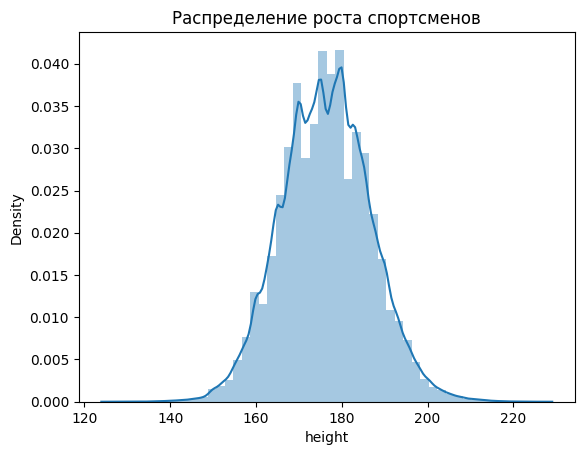

In [27]:
# распределение роста спортсменов
sns_plot = sns.distplot(bio['height']).set_title('Распределение роста спортсменов')
fig = sns_plot.get_figure()



Диапазон роста: Большинство спортсменов имеют рост между 140 см и 200 см.

Пик распределения: Наибольшая плотность (вероятность) наблюдается в районе 160–180 см — это "типичный" рост для данной выборки.

Хвосты распределения:

Крайне низкие значения (<140 см) и высокие (>200 см) встречаются редко (плотность близка к нулю).

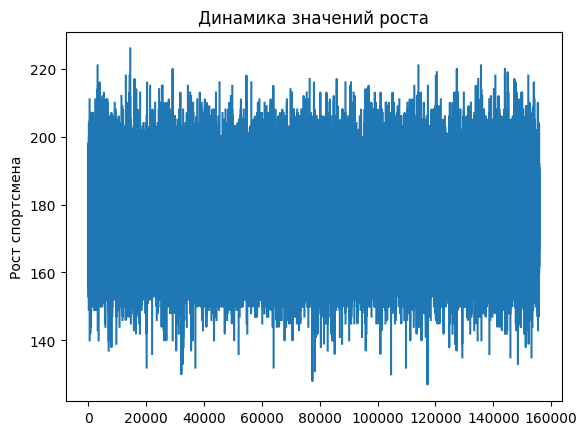

In [28]:
# выбросы
plt.plot(bio['height'])
plt.title('Динамика значений роста')
plt.ylabel('Рост спортсмена')
plt.show()

Разброс значений: Рост варьируется в пределах 140–220 см, что согласуется с биологическими пределами.

Единичные точки достигают 220 см, минимумы около 140 см

In [29]:
# есть диапазон по весу
bio['weight'].value_counts()

,count
weight,
70,4818
75,4215
60,3796
68,3640
80,3369
...,...
105-113,1
92-94,1
65-71,1


In [30]:
# берем только год рождения спортсмена, извлекаем из столбца born
bio['birth_year'] = pd.to_numeric(bio['born'].str.split().str[-1], errors='coerce').astype('Int64')
bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,birth_year
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,1949
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,1977
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,1986
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,1908
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN,1900


In [31]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155861 non-null  int64  
 1   name           155861 non-null  object 
 2   sex            155861 non-null  object 
 3   born           151808 non-null  object 
 4   height         105112 non-null  float64
 5   weight         105112 non-null  object 
 6   country        155861 non-null  object 
 7   country_noc    155861 non-null  object 
 8   description    54863 non-null   object 
 9   special_notes  60637 non-null   object 
 10  birth_year     151573 non-null  Int64  
dtypes: Int64(1), float64(1), int64(1), object(8)
memory usage: 13.2+ MB


In [32]:
weight_split = bio['weight'].str.split('-', n=1, expand=True)
weight_split.columns = ['weight_new', 'weight_new2']

In [33]:
bio = bio.join(weight_split)

Разделяем значения веса, указанные как диапазон (например, `'65-70'`) на две колонки:
- `weight_new` — нижняя граница
- `weight_new2` — верхняя

In [ ]:
bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes,birth_year,weight_new,weight_new2
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN,1949,55,None
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...,1977,70,None
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...,1986,55,None
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN,1908,NaN,NaN
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN,1900,NaN,NaN


In [34]:
bio['weight_new'] = pd.to_numeric(bio['weight_new'], errors='coerce')
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   athlete_id     155861 non-null  int64  
 1   name           155861 non-null  object 
 2   sex            155861 non-null  object 
 3   born           151808 non-null  object 
 4   height         105112 non-null  float64
 5   weight         105112 non-null  object 
 6   country        155861 non-null  object 
 7   country_noc    155861 non-null  object 
 8   description    54863 non-null   object 
 9   special_notes  60637 non-null   object 
 10  birth_year     151573 non-null  Int64  
 11  weight_new     105088 non-null  float64
 12  weight_new2    937 non-null     object 
dtypes: Int64(1), float64(2), int64(1), object(9)
memory usage: 15.6+ MB


In [35]:
# переименовываем столбец страны с athlete_country чтобы не было путаници со страной игр в дальнейшем
bio = bio.rename(columns={"country": "athlete_country"})
bio.columns

Index(['athlete_id', 'name', 'sex', 'born', 'height', 'weight',
       'athlete_country', 'country_noc', 'description', 'special_notes',
       'birth_year', 'weight_new', 'weight_new2'],
      dtype='object')

In [36]:
# оставляем необходимые для анализа столбцы
bio = bio[['athlete_id', 'name', 'sex', 'height', 'weight_new', 'athlete_country', 'birth_year']]
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155861 entries, 0 to 155860
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   athlete_id       155861 non-null  int64  
 1   name             155861 non-null  object 
 2   sex              155861 non-null  object 
 3   height           105112 non-null  float64
 4   weight_new       105088 non-null  float64
 5   athlete_country  155861 non-null  object 
 6   birth_year       151573 non-null  Int64  
dtypes: Int64(1), float64(2), int64(1), object(3)
memory usage: 8.5+ MB


In [37]:
# описательная статистика
bio_params = bio[['height', 'weight_new']]
bio_params.describe()

,height,weight_new
count,105112.000000,105088.000000
mean,176.327194,71.900807
std,10.355980,14.460831
min,127.000000,25.000000
25%,170.000000,62.000000
50%,176.000000,70.000000
75%,183.000000,80.000000
max,226.000000,210.000000


/tmp/ipython-input-38-3614888846.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(bio['weight_new'])


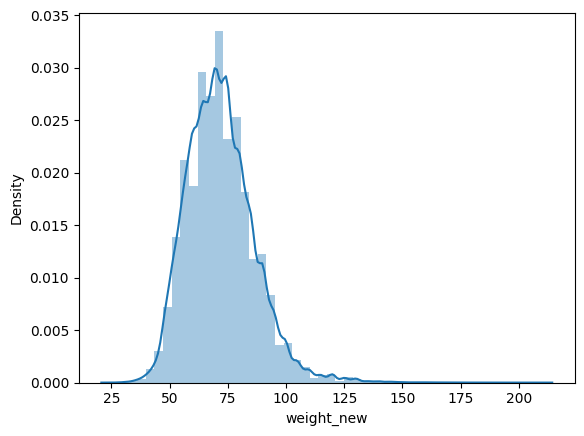

In [38]:
# распределение веса спортсменов
sns_plot = sns.distplot(bio['weight_new'])
fig = sns_plot.get_figure()

Основной диапазон: Большая часть данных сосредоточена между 50 и 150

Пик: Находится в районе 75–100 — это наиболее часто встречающееся значение.

Левый хвост (25–50) и правый хвост (150–200) показывают редкие/экстремальные значения.

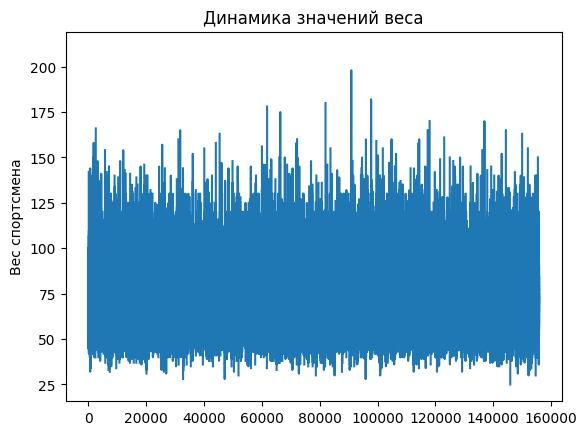

In [39]:
# выбросы
plt.plot(bio['weight_new'])
plt.title('Динамика значений веса')
plt.ylabel('Вес спортсмена')
plt.show()

Разброс значений: Вес варьируется в пределах 40–160, что согласуется с биологическими пределами.

Единичные точки достигают 190, минимумы около 40

Есть выбросы

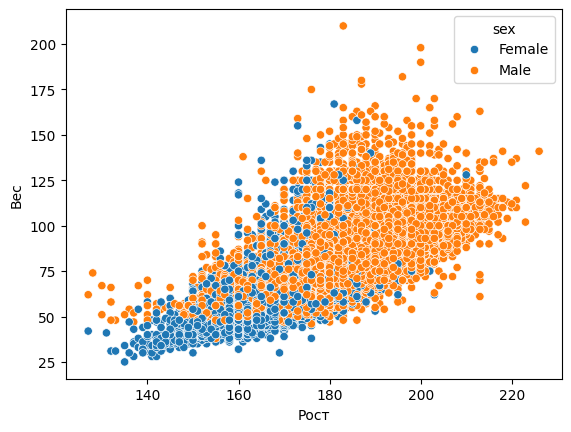

In [40]:
# распределение веса и роста (м и ж) - также видим выбросы
df2 = bio[(bio.weight_new != 0.0) & (bio.height != 0.0)]
sns.scatterplot(x=df2.height, y=df2.weight_new, hue='sex', data=df2)
plt.xlabel("Рост")
plt.ylabel("Вес");

Построен график зависимости веса от роста по полу.
- Видна линейная положительная зависимость
- Мужчины, как правило, выше и тяжелее
- Имеются выбросы



Таким образом были построены графики для визуального анализа. Эти графики позволяют оценить тренды, зависимости и особенности распределений между признаками.

In [41]:
# добавим столбцец с сезоном
results_event['season'] = (results_event['edition'].str[5:11])
results_event.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,season
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False,Summer
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False,Summer
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False,Summer
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False,Summer
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False,Summer


In [42]:
# помимио зимних и летних олимпийских игр в датасете есть:
# внеочередные Олимпийские игры 1906 года
# конный спорт Олимпийских игр 1956 год был проведен не в Австралии, а в Швеции - заменяем на Summer

results_event.groupby('season').count().sort_values('athlete', ascending=False).head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
season,,,,,,,,,,,
Summer,254658,254658,254658,254658,254658,254658,254658,254658,254658,37374,254658
Winter,61853,61853,61853,61853,61853,61853,61853,61853,61853,7277,61853
Equest,300,300,300,300,300,300,300,300,300,36,300
Inter,23,23,23,23,23,23,23,23,23,0,23


In [43]:
results_event[results_event['season'].isin(['Equest'])]

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,season
3092,1956 Equestrian Olympics,48,CAM,Equestrian Jumping,"Individual, Open",185170,Saing Pen,12677,DNF,NaN,False,Equest
3093,1956 Equestrian Olympics,48,CAM,Equestrian Jumping,"Individual, Open",185170,Isoup Ganthy,12001,DNF,NaN,False,Equest
26069,1956 Equestrian Olympics,48,BUL,Equestrian Dressage,"Individual, Open",185163,Krum Lekarski,12307,36,NaN,False,Equest
26070,1956 Equestrian Olympics,48,BUL,Equestrian Eventing,"Individual, Men",185153,Genko Rashkov,12606,5,NaN,False,Equest
26071,1956 Equestrian Olympics,48,BUL,Equestrian Eventing,"Individual, Men",185153,Konstantin Venkov,12924,DNF,NaN,False,Equest
...,...,...,...,...,...,...,...,...,...,...,...,...
302183,1956 Equestrian Olympics,48,USA,Equestrian Jumping,"Individual, Open",185170,Bill Steinkraus,12787,=15,NaN,False,Equest
302184,1956 Equestrian Olympics,48,USA,Equestrian Jumping,"Individual, Open",185170,Frank Chapot,11746,=27,NaN,False,Equest
302185,1956 Equestrian Olympics,48,USA,Equestrian Jumping,"Team, Open",185173,Hugh Wiley,13003,5,NaN,True,Equest
302186,1956 Equestrian Olympics,48,USA,Equestrian Jumping,"Team, Open",185173,Bill Steinkraus,12787,5,NaN,True,Equest


In [44]:
# удалить 23 запись
results_event[results_event['season'].isin([' Inter'])]

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport,season
3560,1906 Intercalated Games,4,CRT,Athletics,"400 metres, Men",56190,Evangelos Volanakis,79698,DNS,NaN,False,Inter
3561,1906 Intercalated Games,4,CRT,Athletics,"400 metres, Men",56190,Michail Giannarakis,79699,DNS,NaN,False,Inter
3562,1906 Intercalated Games,4,CRT,Athletics,"800 metres, Men",56200,Evangelos Volanakis,79698,DNS,NaN,False,Inter
3563,1906 Intercalated Games,4,CRT,Athletics,"800 metres, Men",56200,Michail Giannarakis,79699,DNS,NaN,False,Inter
3564,1906 Intercalated Games,4,CRT,Athletics,"1,500 metres, Men",56207,Evangelos Volanakis,79698,DNS,NaN,False,Inter
3565,1906 Intercalated Games,4,CRT,Athletics,"1,500 metres, Men",56207,Michail Giannarakis,79699,DNS,NaN,False,Inter
3566,1906 Intercalated Games,4,CRT,Athletics,"5 miles, Men",56212,Evangelos Volanakis,79698,DNS,NaN,False,Inter
3567,1906 Intercalated Games,4,CRT,Athletics,"5 miles, Men",56212,Michail Giannarakis,79699,DNS,NaN,False,Inter
3568,1906 Intercalated Games,4,CRT,Athletics,"Marathon, Men",56213,V. Boulakakis,79638,DNF,NaN,False,Inter
3569,1906 Intercalated Games,4,CRT,Athletics,"Marathon, Men",56213,Christos Ferarolakis,79647,DNF,NaN,False,Inter


In [45]:
results_event = results_event.drop(results_event[results_event.season == ' Inter'].index)
results_event.groupby('season').count().sort_values('athlete', ascending=False).head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
season,,,,,,,,,,,
Summer,254658,254658,254658,254658,254658,254658,254658,254658,254658,37374,254658
Winter,61853,61853,61853,61853,61853,61853,61853,61853,61853,7277,61853
Equest,300,300,300,300,300,300,300,300,300,36,300


In [46]:
# замена Конный спорт Олимпийских на Summer
results_event.season = results_event.season.str.replace('Equest','Summer')
results_event.groupby('season').count().sort_values('athlete', ascending=False).head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
season,,,,,,,,,,,
Summer,254958,254958,254958,254958,254958,254958,254958,254958,254958,37410,254958
Winter,61853,61853,61853,61853,61853,61853,61853,61853,61853,7277,61853


In [47]:
results_event.columns

Index(['edition', 'edition_id', 'country_noc', 'sport', 'event', 'result_id',
       'athlete', 'athlete_id', 'pos', 'medal', 'isTeamSport', 'season'],
      dtype='object')

In [48]:
# удалем столбец со страной и столбец athlete, данные есть в таблице bio
results_event = results_event[['edition', 'edition_id', 'sport', 'event', 'result_id',
       'athlete_id', 'pos', 'medal', 'isTeamSport', 'season']]

In [49]:
results_event.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316811 entries, 0 to 316833
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   edition      316811 non-null  object
 1   edition_id   316811 non-null  int64 
 2   sport        316811 non-null  object
 3   event        316811 non-null  object
 4   result_id    316811 non-null  int64 
 5   athlete_id   316811 non-null  int64 
 6   pos          316811 non-null  object
 7   medal        44687 non-null   object
 8   isTeamSport  316811 non-null  bool  
 9   season       316811 non-null  object
dtypes: bool(1), int64(3), object(6)
memory usage: 24.5+ MB


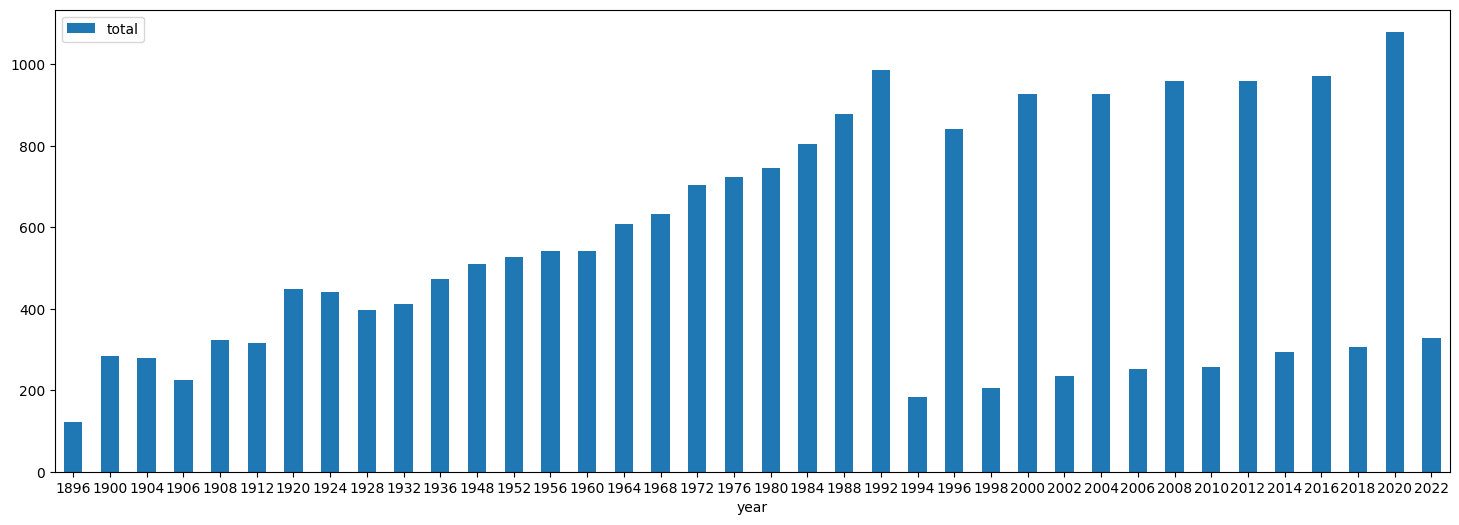

In [50]:
# столбчатый график
plt.rcParams["figure.figsize"] = (18,6)
year_medal = medal[['year', 'total']].groupby('year').sum().plot.bar(rot=0)

Столбчатая диаграмма показывает общее количество медалей по годам. Можно выделить периоды с пиками активности после 2000-х

In [51]:
# описательная статистика
medal.describe()

,edition_id,year,gold,silver,bronze,total
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,31.635307,1979.744328,3.737133,3.721638,3.971223,11.429994
std,18.472012,32.726372,7.554092,6.411636,6.169554,19.423201
min,1.000000,1896.000000,0.000000,0.000000,0.000000,1.000000
25%,17.000000,1960.000000,0.000000,1.000000,1.000000,2.000000
50%,25.000000,1988.000000,1.000000,2.000000,2.000000,5.000000
75%,53.000000,2008.000000,4.000000,4.000000,5.000000,13.000000
max,62.000000,2022.000000,83.000000,85.000000,83.000000,248.000000


 Проведён обзор распределения числовых данных. Это помогает выявить средние значения, выбросы и диапазоны признаков, таких как рост, вес и возраст.

In [52]:
# описательная статистиска
games.describe()

,edition_id,year
count,64.000000,64.000000
mean,38.578125,1967.750000
std,46.504072,37.385168
min,1.000000,1896.000000
25%,16.750000,1939.000000
50%,34.500000,1968.000000
75%,50.250000,1998.500000
max,372.000000,2032.000000


Проведён обзор распределения числовых данных. Это помогает выявить средние значения, выбросы и диапазоны признаков, таких как рост, вес и возраст.

In [53]:
# сортирую по годам
games.sort_values(by='year', ascending=False)

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
34,2032 Summer Olympics,372,/editions/372,2032,Brisbane,https://olympedia-flags.s3.eu-central-1.amazon...,AUS,NaN,NaN,—,NaN
33,2028 Summer Olympics,64,/editions/64,2028,Los Angeles,https://olympedia-flags.s3.eu-central-1.amazon...,USA,NaN,NaN,—,NaN
61,2026 Winter Olympics,72,/editions/72,2026,Milano-Cortina d'Ampezzo,https://olympedia-flags.s3.eu-central-1.amazon...,ITA,6 February,22 February,4 – 22 February,NaN
32,2024 Summer Olympics,63,/editions/63,2024,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,—,NaN
60,2022 Winter Olympics,62,/editions/62,2022,Beijing,https://olympedia-flags.s3.eu-central-1.amazon...,CHN,4 February,20 February,2 – 20 February,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN
63,1906 Intercalated,4,/editions/4,1906,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,22 April,2 May,22 April – 2 May,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,NaN,1 July – 26 November,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,14 May – 28 October,NaN


In [54]:
# заполняем isHeld т.к. только 5 игр не проводились
games[games['isHeld'].isin(['Not held due to war'])]

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
5,1916 Summer Olympics,50,/editions/50,1916,Berlin,https://olympedia-flags.s3.eu-central-1.amazon...,GER,NaN,NaN,—,Not held due to war
11,1940 Summer Olympics,51,/editions/51,1940,Helsinki,https://olympedia-flags.s3.eu-central-1.amazon...,FIN,NaN,NaN,—,Not held due to war
12,1944 Summer Olympics,52,/editions/52,1944,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,NaN,NaN,—,Not held due to war
39,1940 Winter Olympics,55,/editions/55,1940,Garmisch-Partenkirchen,https://olympedia-flags.s3.eu-central-1.amazon...,GER,NaN,NaN,—,Not held due to war
40,1944 Winter Olympics,56,/editions/56,1944,Cortina d'Ampezzo,https://olympedia-flags.s3.eu-central-1.amazon...,ITA,NaN,NaN,—,Not held due to war


In [55]:
# добавляем в таблицу полное название страны проведение игр из таблицы countries
games = games.merge(country, left_on='country_noc', right_on='noc', how='left')
games.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld,noc,country
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,NaN,GRE,Greece
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,14 May – 28 October,NaN,FRA,France
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,NaN,1 July – 26 November,NaN,USA,United States
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN,GBR,Great Britain
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,NaN,SWE,Sweden


Выполнено объединение таблиц. Это необходимо для формирования общей картины, связывая информацию об атлетах, результатах и странах.

In [56]:
games.columns

Index(['edition', 'edition_id', 'edition_url', 'year', 'city',
       'country_flag_url', 'country_noc', 'start_date', 'end_date',
       'competition_date', 'isHeld', 'noc', 'country'],
      dtype='object')

In [57]:
# оставлем необходимую для анализа информацию
games = games[['edition_id', 'year', 'country', 'city']]
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   edition_id  64 non-null     int64 
 1   year        64 non-null     int64 
 2   country     64 non-null     object
 3   city        64 non-null     object
dtypes: int64(2), object(2)
memory usage: 2.1+ KB


In [58]:
# объединение трех таблиц для анализа
bio_res = results_event.merge(bio, on = 'athlete_id', how='left').merge(games, on = 'edition_id', how='left')
bio_res.head()

,edition,edition_id,sport,event,result_id,athlete_id,pos,medal,isTeamSport,season,name,sex,height,weight_new,athlete_country,birth_year,year,country,city
0,1908 Summer Olympics,5,Athletics,"100 metres, Men",56265,64710,DNS,NaN,False,Summer,Ernest Hutcheon,Male,NaN,NaN,Australasia,1889,1908,Great Britain,London
1,1908 Summer Olympics,5,Athletics,"400 metres, Men",56313,64756,DNS,NaN,False,Summer,Henry Murray,Male,NaN,NaN,Australasia,1886,1908,Great Britain,London
2,1908 Summer Olympics,5,Athletics,"800 metres, Men",56338,64808,3 h8 r1/2,NaN,False,Summer,Harvey Sutton,Male,NaN,NaN,Australasia,1882,1908,Great Britain,London
3,1908 Summer Olympics,5,Athletics,"800 metres, Men",56338,922519,DNS,NaN,False,Summer,Guy Haskins,Male,NaN,NaN,Australasia,1883,1908,Great Britain,London
4,1908 Summer Olympics,5,Athletics,"800 metres, Men",56338,64735,DNS,NaN,False,Summer,Joseph Lynch,Male,NaN,NaN,Australasia,1878,1908,Great Britain,London


Выполнено объединение таблиц. Это необходимо для формирования общей картины, связывая информацию об атлетах, результатах и странах.

In [59]:
bio_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316811 entries, 0 to 316810
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   edition          316811 non-null  object 
 1   edition_id       316811 non-null  int64  
 2   sport            316811 non-null  object 
 3   event            316811 non-null  object 
 4   result_id        316811 non-null  int64  
 5   athlete_id       316811 non-null  int64  
 6   pos              316811 non-null  object 
 7   medal            44687 non-null   object 
 8   isTeamSport      316811 non-null  bool   
 9   season           316811 non-null  object 
 10  name             316804 non-null  object 
 11  sex              316804 non-null  object 
 12  height           229443 non-null  float64
 13  weight_new       229385 non-null  float64
 14  athlete_country  316804 non-null  object 
 15  birth_year       310761 non-null  Int64  
 16  year             316811 non-null  int6

In [60]:
bio_res.columns

Index(['edition', 'edition_id', 'sport', 'event', 'result_id', 'athlete_id',
       'pos', 'medal', 'isTeamSport', 'season', 'name', 'sex', 'height',
       'weight_new', 'athlete_country', 'birth_year', 'year', 'country',
       'city'],
      dtype='object')

In [61]:
# оставляем только необходимые для анализа столбцы
bio_results = bio_res[['edition', 'season', 'country', 'city', 'year','sport', 'event', 'isTeamSport', 'name', 'sex', 'height','weight_new', 'athlete_country', 'birth_year', 'pos', 'medal']]


In [62]:
bio_results.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal
0,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"100 metres, Men",False,Ernest Hutcheon,Male,NaN,NaN,Australasia,1889,DNS,NaN
1,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"400 metres, Men",False,Henry Murray,Male,NaN,NaN,Australasia,1886,DNS,NaN
2,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"800 metres, Men",False,Harvey Sutton,Male,NaN,NaN,Australasia,1882,3 h8 r1/2,NaN
3,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"800 metres, Men",False,Guy Haskins,Male,NaN,NaN,Australasia,1883,DNS,NaN
4,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"800 metres, Men",False,Joseph Lynch,Male,NaN,NaN,Australasia,1878,DNS,NaN


In [63]:
bio_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316811 entries, 0 to 316810
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   edition          316811 non-null  object 
 1   season           316811 non-null  object 
 2   country          316811 non-null  object 
 3   city             316811 non-null  object 
 4   year             316811 non-null  int64  
 5   sport            316811 non-null  object 
 6   event            316811 non-null  object 
 7   isTeamSport      316811 non-null  bool   
 8   name             316804 non-null  object 
 9   sex              316804 non-null  object 
 10  height           229443 non-null  float64
 11  weight_new       229385 non-null  float64
 12  athlete_country  316804 non-null  object 
 13  birth_year       310761 non-null  Int64  
 14  pos              316811 non-null  object 
 15  medal            44687 non-null   object 
dtypes: Int64(1), bool(1), float64(2), int6

In [65]:
# добавляем новый столбец с возрастом спортсмена (как разницу между годом его рождения и годом проведения Олимпиады)
bio_results['age'] = bio_results['year'] - bio_results['birth_year']
bio_results.head()

/tmp/ipython-input-65-3066990744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bio_results['age'] = bio_results['year'] - bio_results['birth_year']


,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal,age
0,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"100 metres, Men",False,Ernest Hutcheon,Male,NaN,NaN,Australasia,1889,DNS,NaN,19
1,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"400 metres, Men",False,Henry Murray,Male,NaN,NaN,Australasia,1886,DNS,NaN,22
2,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"800 metres, Men",False,Harvey Sutton,Male,NaN,NaN,Australasia,1882,3 h8 r1/2,NaN,26
3,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"800 metres, Men",False,Guy Haskins,Male,NaN,NaN,Australasia,1883,DNS,NaN,25
4,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"800 metres, Men",False,Joseph Lynch,Male,NaN,NaN,Australasia,1878,DNS,NaN,30


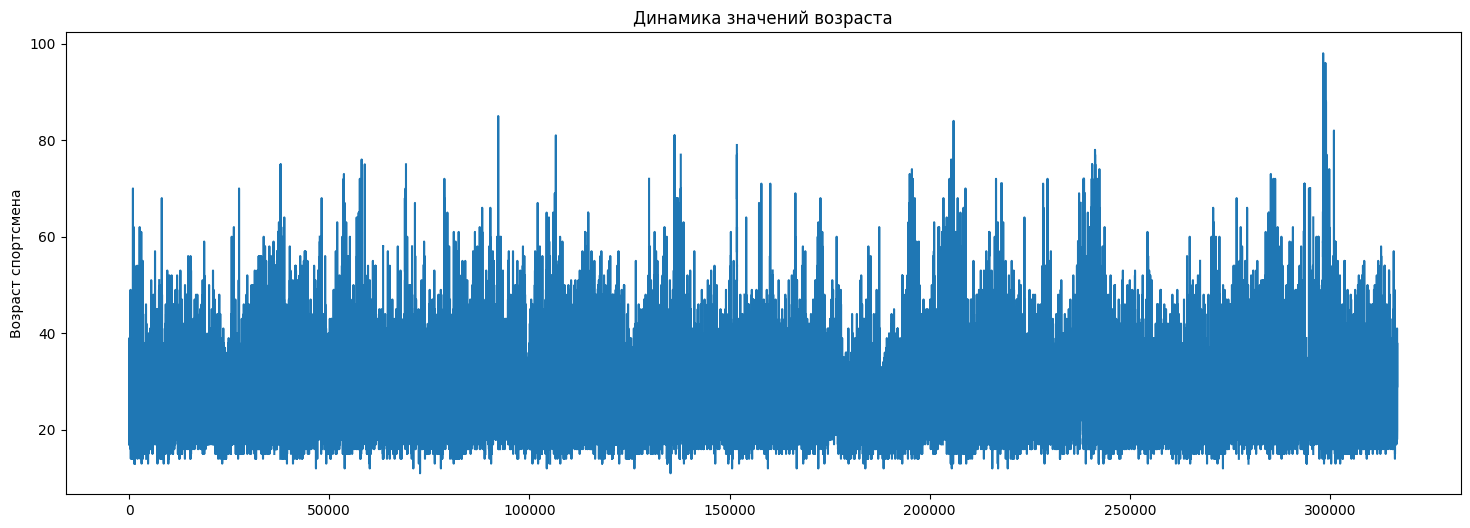

In [66]:
# строим график
plt.plot(bio_results['age'])
plt.title('Динамика значений возраста')
plt.ylabel('Возраст спортсмена')
plt.show()

Есть визуально выбивающиеся значения

/tmp/ipython-input-67-2460268641.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(bio_results['age'])


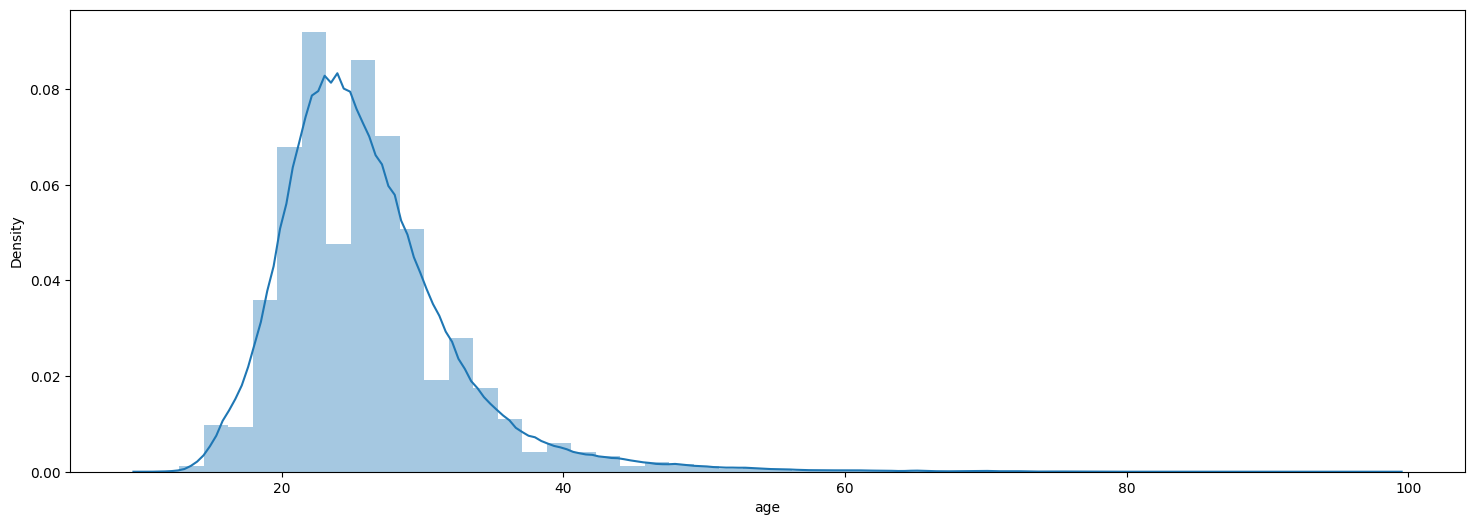

In [67]:
# строим распределение
sns_plot = sns.distplot(bio_results['age'])
fig = sns_plot.get_figure()

Очень длинный хвост

In [68]:
# откидываем 1% наибольших и 1% наименьших значений
age_low = bio_results['age'].quantile(0.01)
age_hi  = bio_results['age'].quantile(0.99)

h_low = bio_results['height'].quantile(0.01)
h_hi  = bio_results['height'].quantile(0.99)

w_low = bio_results['weight_new'].quantile(0.01)
w_hi  = bio_results['weight_new'].quantile(0.99)

df_filtered = bio_results[(bio_results['age'] < age_hi) & (bio_results['age'] > age_low)
                & (bio_results['height'] < h_hi) & (bio_results['height'] > h_low)
                & (bio_results['weight_new'] < w_hi) & (bio_results['weight_new'] > w_low)]

df_filtered.describe()

,year,height,weight_new,birth_year,age
count,216536.000000,216536.000000,216536.000000,216536.0,216536.0
mean,1990.715567,175.480003,70.441169,1964.939456,25.776111
std,21.848019,9.466000,12.403980,21.801074,5.071243
min,1896.000000,152.000000,44.000000,1853.0,17.0
25%,1976.000000,169.000000,61.000000,1951.0,22.0
50%,1996.000000,175.000000,70.000000,1969.0,25.0
75%,2008.000000,182.000000,79.000000,1982.0,29.0
max,2022.000000,199.000000,112.000000,2004.0,48.0


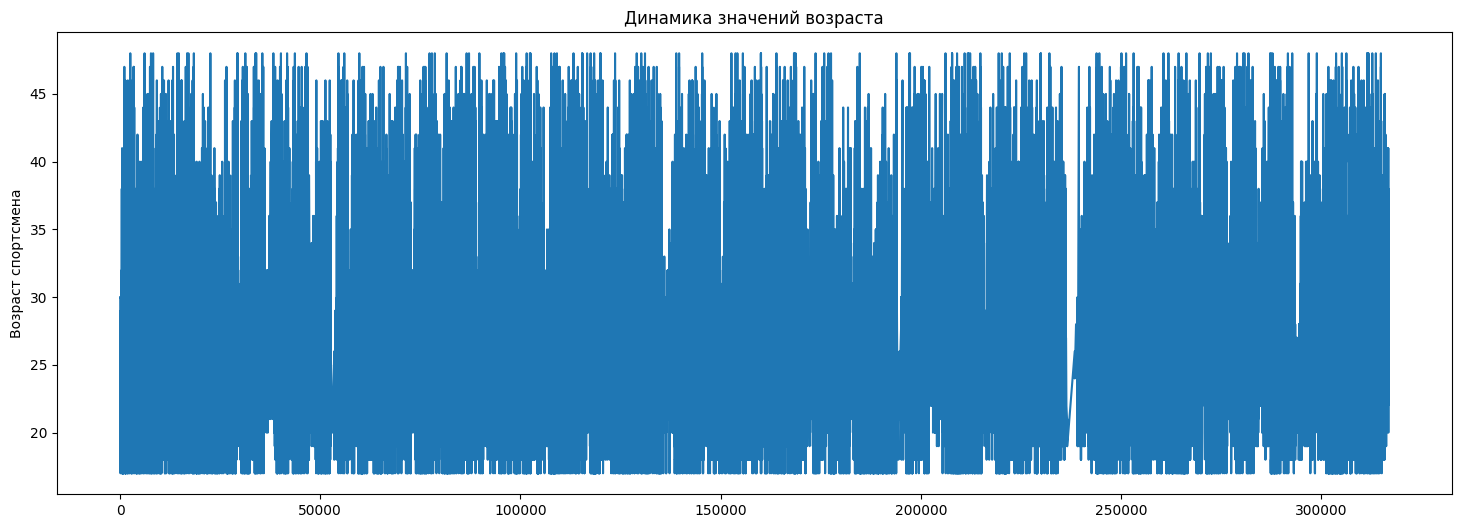

In [69]:
# строим график
plt.plot(df_filtered['age'])
plt.title('Динамика значений возраста')
plt.ylabel('Возраст спортсмена')
plt.show()

Проверяем визуально - динамики равномерны

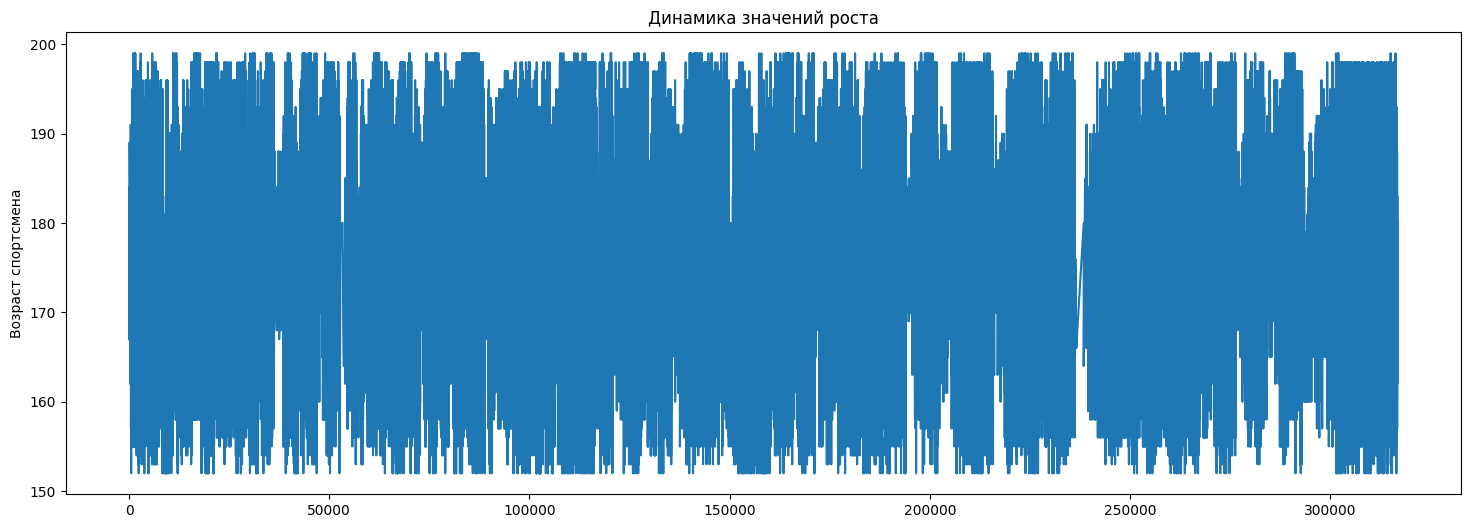

In [71]:
# строим график
plt.plot(df_filtered['height'])
plt.title('Динамика значений роста')
plt.ylabel('Возраст спортсмена')
plt.show()

Проверяем визуально - динамики равномерны


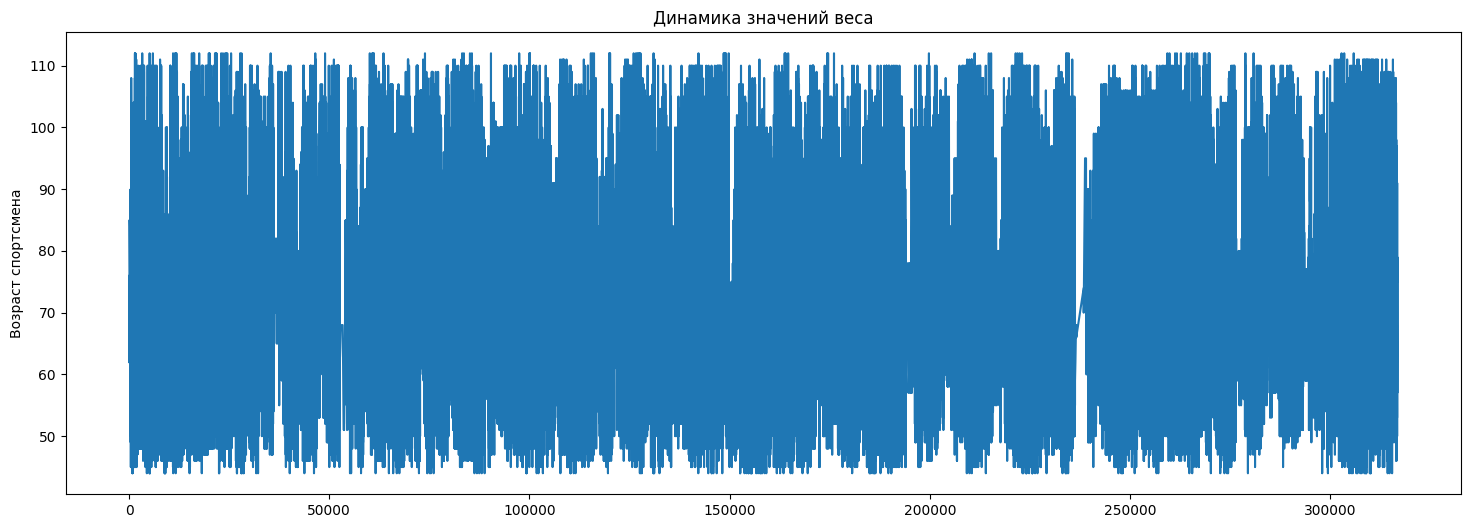

In [72]:
# строим график
plt.plot(df_filtered['weight_new'])
plt.title('Динамика значений веса')
plt.ylabel('Возраст спортсмена')
plt.show()

Проверяем визуально - динамики равномерны

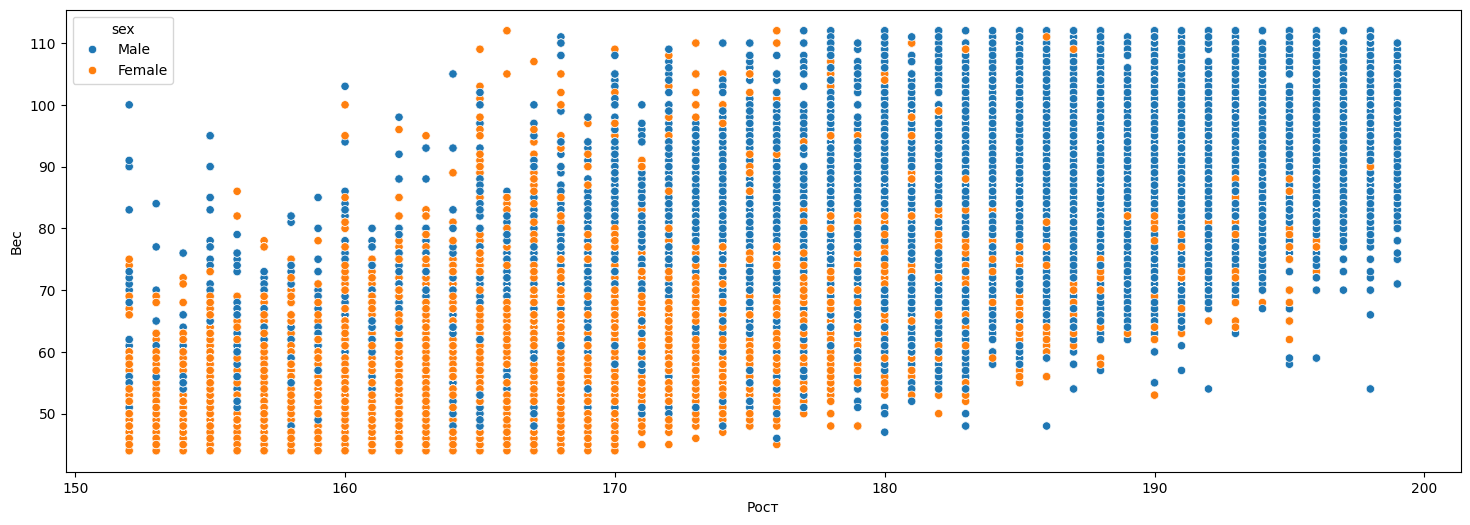

In [73]:
# распределение веса и роста (м и ж)
df3 = df_filtered[(df_filtered.weight_new != 0.0) & (df_filtered.height != 0.0)]
sns.scatterplot(x=df3.height, y=df3.weight_new, hue='sex', data=df3)
plt.xlabel("Рост")
plt.ylabel("Вес");

 Распределение веса и роста (м и ж) более равномерно

In [74]:
# ушли пустые значения
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216536 entries, 9 to 316809
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   edition          216536 non-null  object 
 1   season           216536 non-null  object 
 2   country          216536 non-null  object 
 3   city             216536 non-null  object 
 4   year             216536 non-null  int64  
 5   sport            216536 non-null  object 
 6   event            216536 non-null  object 
 7   isTeamSport      216536 non-null  bool   
 8   name             216536 non-null  object 
 9   sex              216536 non-null  object 
 10  height           216536 non-null  float64
 11  weight_new       216536 non-null  float64
 12  athlete_country  216536 non-null  object 
 13  birth_year       216536 non-null  Int64  
 14  pos              216536 non-null  object 
 15  medal            31399 non-null   object 
 16  age              216536 non-null  Int64  
d

In [75]:
# убираем пропуски
df_filtered.isna().sum()

,0
edition,0
season,0
country,0
city,0
year,0
sport,0
event,0
isTeamSport,0
name,0
sex,0


In [76]:
# сохраняем предобработанные результаты в файл для более быстрого подключения
df_filtered.to_csv('df_filtered.csv')

# **Анализ данных и построение модели**



**Анализ распределения спортсменов по полу и возрасту**




In [77]:
olymp = pd.read_csv('df_filtered.csv', index_col=[0])
olymp.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal,age
9,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"1,500 metres, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,DNS,NaN,30
10,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"5 miles, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,3 h1 r1/2,NaN,30
15,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"Marathon, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,DNF,NaN,30
20,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"3,500 metres Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879,3,Bronze,29
22,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"10 miles Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879,DNS r2/2,NaN,29


In [78]:
olymp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216536 entries, 9 to 316809
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   edition          216536 non-null  object 
 1   season           216536 non-null  object 
 2   country          216536 non-null  object 
 3   city             216536 non-null  object 
 4   year             216536 non-null  int64  
 5   sport            216536 non-null  object 
 6   event            216536 non-null  object 
 7   isTeamSport      216536 non-null  bool   
 8   name             216536 non-null  object 
 9   sex              216536 non-null  object 
 10  height           216536 non-null  float64
 11  weight_new       216536 non-null  float64
 12  athlete_country  216536 non-null  object 
 13  birth_year       216536 non-null  int64  
 14  pos              216536 non-null  object 
 15  medal            31399 non-null   object 
 16  age              216536 non-null  int64  
d

In [79]:
print('Полностью дублированных строк:')
print(olymp.duplicated().sum())

Полностью дублированных строк:
46


In [80]:
# избавимся от дубликатов
olymp.drop_duplicates(inplace=True)

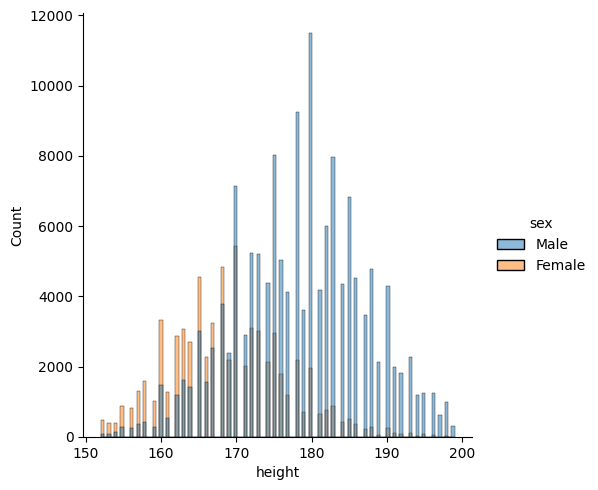

In [81]:
# распределение роста спортсменов М и Ж
sns.displot(x='height',
            hue='sex',
            data=olymp)

Распределение роста спортсменов М и Ж = мужчины ожидаемо выше

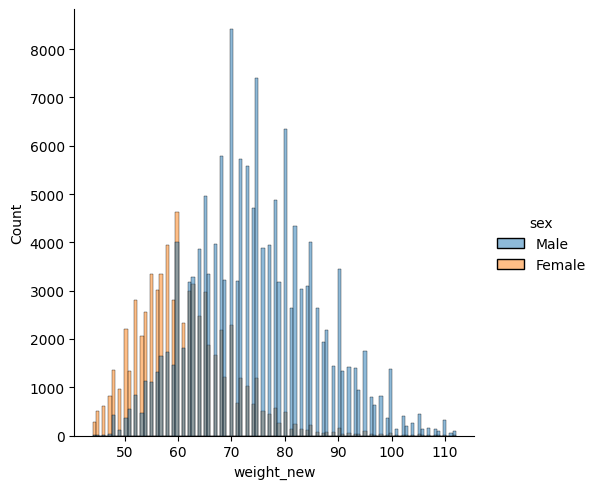

In [82]:
# распределение веса спортсменов М и Ж
sns.displot(x='weight_new',
            hue='sex',
            data=olymp);

Распределение веса спортсменов М и Ж = вес мужчин ожидаемо больше

In [83]:
olymp['medal'].value_counts()

,count
medal,
Bronze,10570
Gold,10560
Silver,10268


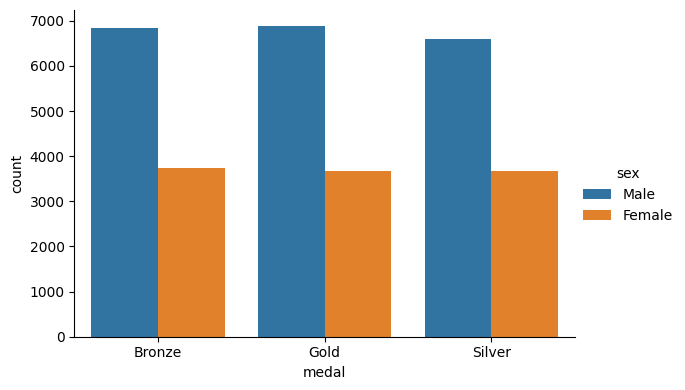

In [84]:
# распределение медалей М и Ж
sns.catplot(x="medal", hue="sex",
                data=olymp, kind="count",
                height=4, aspect=1.5);

Больше всего медалей у мужчин

**Самый многочисленный вид спорта**

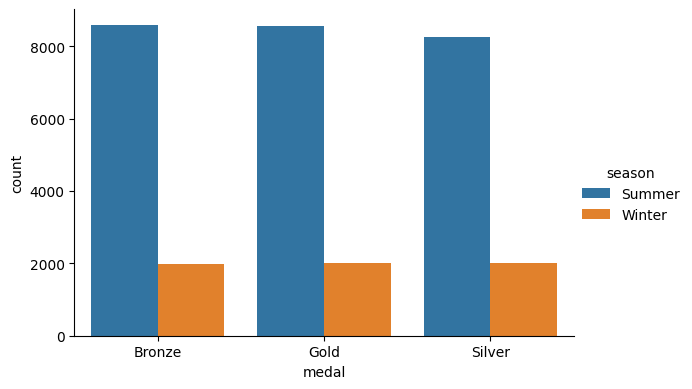

In [85]:
# распределение медалей по сезону
sns.catplot(x="medal", hue="season",
                data=olymp, kind="count",
                height=4, aspect=1.5);

Больше всег медалей летом

In [86]:
# кол-во спортсменов по виду спорта (топ 10)
sport_country = olymp[['sport','name']]
sport_country.groupby('sport').count().sort_values('name', ascending=False).head(10)

,name
sport,
Athletics,35852
Swimming,17656
Artistic Gymnastics,15590
Cross Country Skiing,8870
Rowing,7755
Alpine Skiing,7542
Shooting,7203
Fencing,7040
Biathlon,5715


In [87]:
summer_olympic = olymp[olymp.season=='Summer']
summer_sports = len(summer_olympic[['sport']].drop_duplicates())
summer_events = len(summer_olympic[['event']].drop_duplicates())
print(f'Летние виды спорта: {summer_sports}, подвиды: {summer_events}')

Летние виды спорта: 64, подвиды: 507


In [88]:
winter_olympic = olymp[olymp.season=='Winter']
winter_sports = len(winter_olympic[['sport']].drop_duplicates())
winter_events = len(winter_olympic[['event']].drop_duplicates())
print(f'Зимние виды спорта: {winter_sports}, подвиды: {winter_events}')

Зимние виды спорта: 19, подвиды: 122


**Анализ физических характеристик, которые повышают шансы на получение медали**

In [89]:
# средние значения у медалиста роста\веса\возраста
medals = olymp[['height','weight_new','age','medal']]
medals.groupby(['medal']).mean()


,height,weight_new,age
medal,,,
Bronze,176.878903,72.384295,26.129044
Gold,177.540530,73.178314,26.014015
Silver,177.110148,72.735392,26.134982


In [90]:
# сравниваем со средним значением по всей таблице
no_medals = olymp[olymp['medal'].isnull()]
no_medals = no_medals[['height','weight_new','age','medal']]
no_medals.describe()

,height,weight_new,age
count,185092.000000,185092.000000,185092.000000
mean,175.191807,70.046782,25.722225
std,9.400317,12.285546,5.114623
min,152.000000,44.000000,17.000000
25%,168.000000,61.000000,22.000000
50%,175.000000,69.000000,25.000000
75%,182.000000,78.000000,29.000000
max,199.000000,112.000000,48.000000


/tmp/ipython-input-91-4137332423.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=gold_m, palette='coolwarm')


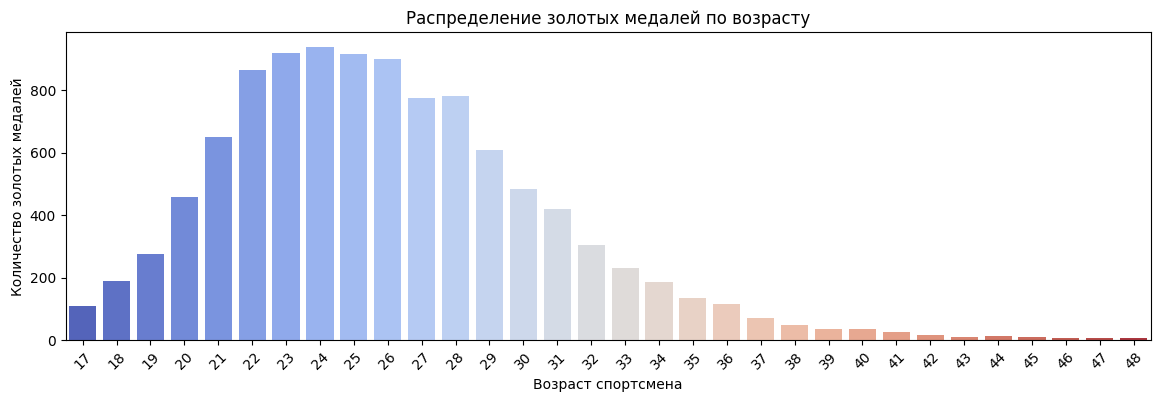

In [91]:
# распределение золотых медалей по возрасту
gold_m = olymp[olymp['medal'] == 'Gold'].copy()
gold_m = gold_m[np.isfinite(gold_m['age'])]
gold_m['age'] = gold_m['age'].astype(int)
plt.figure(figsize=(14, 4))
plt.tight_layout()
sns.countplot(x='age', data=gold_m, palette='coolwarm')
plt.title('Распределение золотых медалей по возрасту')
plt.xlabel('Возраст спортсмена')
plt.ylabel('Количество золотых медалей')
plt.xticks(rotation=45)
plt.show()

Шансы завоевать золотую медаль после 40 очень малы

In [92]:
count_over_40 = int(gold_m['name'][gold_m['age'] > 40].count())
print(count_over_40)

101


In [93]:
df1 = gold_m[(gold_m.age >= 40)][['name','height','age','sport']]
df1['sport'].value_counts()

,count
sport,
Equestrian Dressage,24
Sailing,19
Equestrian Eventing,16
Equestrian Jumping,15
Shooting,14
Fencing,9
Curling,7
Bobsleigh,4
Rowing,4


In [94]:
# создаем мужской датасет по виду спорта
o_men = olymp[(olymp.sex=='Male')][['sex','sport']]
o_men = o_men.groupby('sport').count().sort_values('sex', ascending=False).reset_index()
o_men.head()

,sport,sex
0,Athletics,24021
1,Artistic Gymnastics,11122
2,Swimming,10320
3,Rowing,5579
4,Shooting,5483


In [95]:
# создаем женский датасет по виду спорта
olymp_women = olymp[(olymp.sex=='Female')][['sex','sport']]
olymp_women = olymp_women.groupby('sport').count().sort_values('sex', ascending=False).reset_index()
olymp_women.head()

,sport,sex
0,Athletics,11831
1,Swimming,7336
2,Artistic Gymnastics,4468
3,Cross Country Skiing,3649
4,Alpine Skiing,3090


In [96]:
# создаем мужской датасет (летние игры)
olymp_men_s = olymp[(olymp.sex=='Male') & (olymp.season=='Summer')][['sex','year']]
olymp_men_s = olymp_men_s.groupby('year').count().reset_index()
olymp_men_s.head()

,year,sex
0,1896,61
1,1900,132
2,1904,244
3,1908,568
4,1912,824


/tmp/ipython-input-97-530857938.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(


<Axes: xlabel='year', ylabel='sex'>

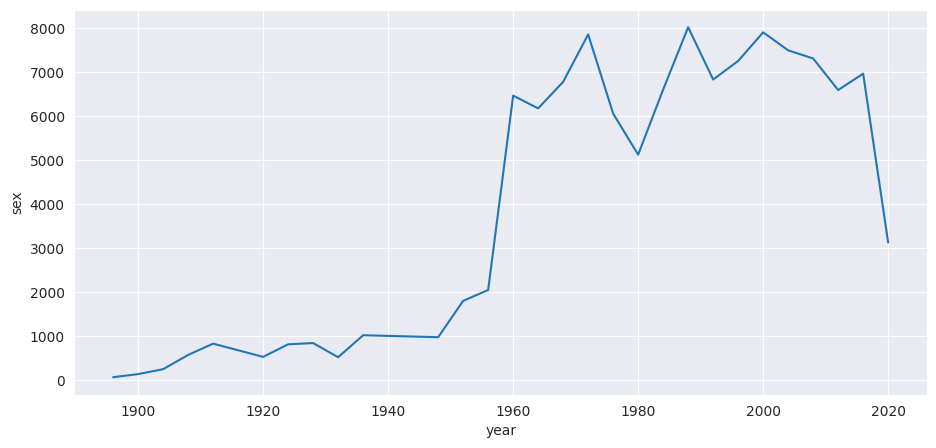

In [97]:
# как менялось количество мужчин, принимавших участие в летних олимпийских играх
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (8, 4)

plt.figure(figsize=(11,5))

sns.lineplot(
    data=olymp_men_s, x="year", y="sex",  err_style="bars", ci=68)

Видим резкий рост между 1940г и 1960г и резкое падение к 2020г

In [98]:
# создаем женский датасет (летние игры)
olymp_women_s = olymp[(olymp.sex=='Female') & (olymp.season=='Summer')][['sex','year']]
olymp_women_s = olymp_women_s.groupby('year').count().reset_index()
olymp_women_s.head()

,year,sex
0,1920,1
1,1924,5
2,1928,63
3,1932,64
4,1936,98


/tmp/ipython-input-99-1558239248.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(


<Axes: xlabel='year', ylabel='sex'>

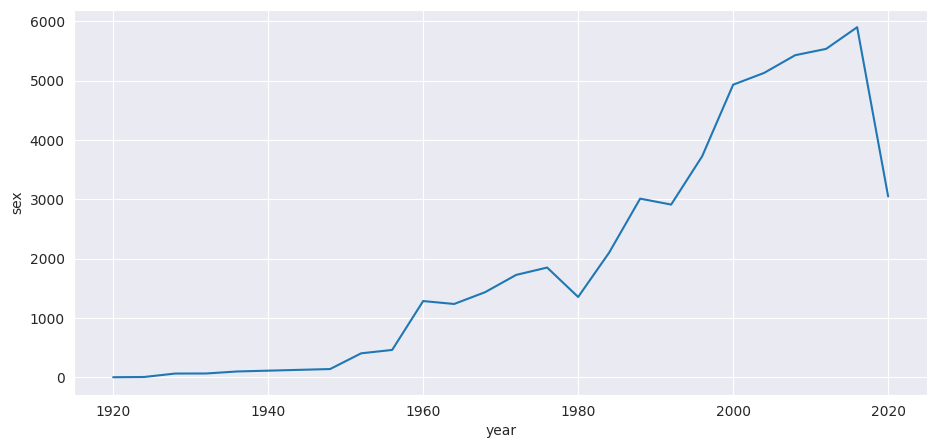

In [99]:
# как менялось количество женщин, принимавших участие в летних олимпийских играх
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (8, 4)

plt.figure(figsize=(11,5))

sns.lineplot(
    data=olymp_women_s, x="year", y="sex",  err_style="bars", ci=68)

Видим плавный рост и резкое падание у 2020г

In [100]:
ages_m = olymp[(olymp.sex=='Male')][['age', 'year']]
ages_m = ages_m.groupby('year').mean().sort_values('year').reset_index()
ages_m.head()

,year,age
0,1896,24.327869
1,1900,23.780303
2,1904,24.266393
3,1908,24.436620
4,1912,24.588592


Средний возраст М:  26.089735523763643


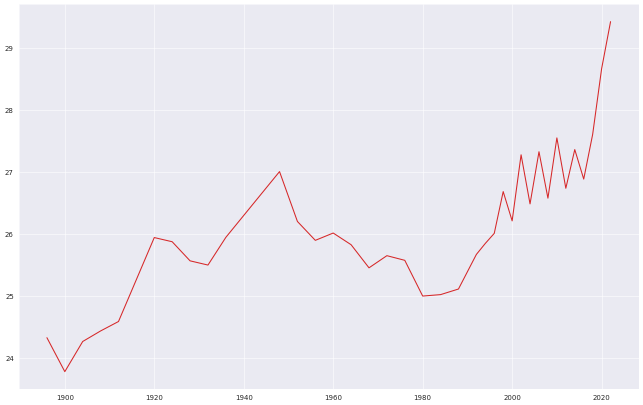

In [101]:
# визуализируем средний возраст мужчин по годам
plt.figure(figsize=(16,10), dpi= 50)
plt.plot('year', 'age', data=ages_m, color='tab:red')
print('Средний возраст М: ', ages_m['age'].mean())

Построена линия тренда среднего возраста мужчин по годам. Это полезно для анализа изменения возраста спортсменов во времени.

Видим резкий скачок среднего возраста после 2000г

В основом диапазон 24-29


In [102]:
ages_w = olymp[(olymp.sex=='Female')][['age', 'year']]
ages_w = ages_w.groupby('year').mean().sort_values('year').reset_index()
ages_w.head()

,year,age
0,1920,36.000000
1,1924,25.500000
2,1928,21.753846
3,1932,21.388060
4,1936,23.873786


Средний возраст Ж:  24.89296575983549


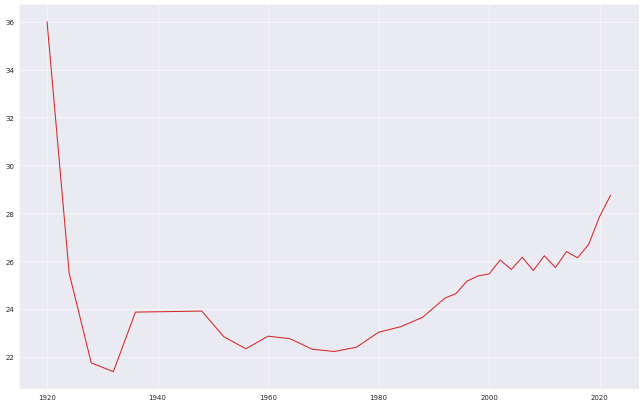

In [103]:
# визуализируем средний возраст женщин по годам
plt.figure(figsize=(16,10), dpi= 50)
plt.plot('year', 'age', data=ages_w, color='tab:red')
print('Средний возраст Ж: ', ages_w['age'].mean())

Построена линия тренда среднего возраста женщин по годам. Это полезно для анализа изменения возраста спортсменов во времени.

Резкий спад среднего возраста после 1920г и постепенное увеличение к 2020г

Диапазон 22-35

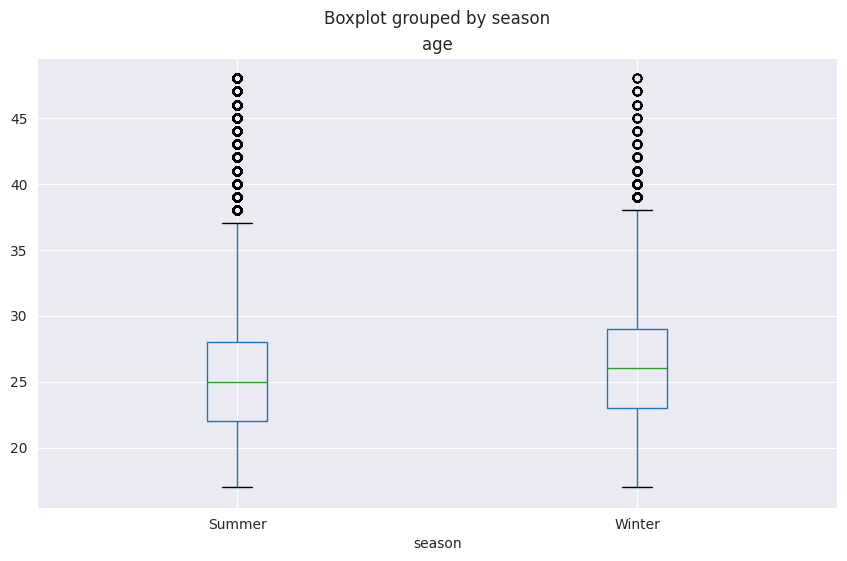

In [104]:
# медиана возраста участников
data = olymp
data.boxplot('age', by='season', figsize=(10, 6));

Медиана возраста участников зимних игр выше, чем летних

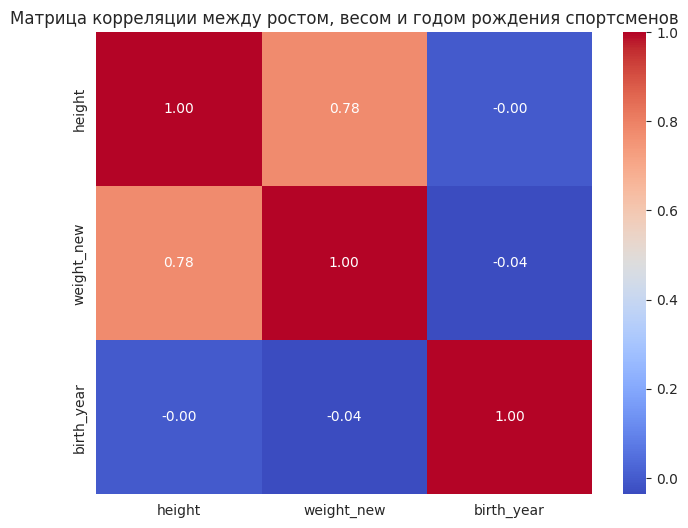

In [105]:
# Строим матрицу корреляции
bio_corr = bio[['height', 'weight_new', 'birth_year']].copy()

bio_corr = bio_corr.dropna()

corr_matrix = bio_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Матрица корреляции между ростом, весом и годом рождения спортсменов')
plt.show()

рост и вес могут иметь корреляцию около 0.78

год рождения (т.е. возраст) и вес — отрицательную

**Построение модели**



In [106]:
# создадим новый столбец, значения заполним 0
olymp['new_medal'] = olymp['medal'].fillna(0)
olymp.head()

,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal,age,new_medal
9,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"1,500 metres, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,DNS,NaN,30,0
10,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"5 miles, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,3 h1 r1/2,NaN,30,0
15,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"Marathon, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,DNF,NaN,30,0
20,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"3,500 metres Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879,3,Bronze,29,Bronze
22,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"10 miles Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879,DNS r2/2,NaN,29,0


In [107]:
# если результат был призовой заполним 1
olymp.new_medal = olymp.new_medal.replace('Gold',1).replace('Silver',1).replace('Bronze',1)
olymp.head()

/tmp/ipython-input-107-393775065.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  olymp.new_medal = olymp.new_medal.replace('Gold',1).replace('Silver',1).replace('Bronze',1)


,edition,season,country,city,year,sport,event,isTeamSport,name,sex,height,weight_new,athlete_country,birth_year,pos,medal,age,new_medal
9,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"1,500 metres, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,DNS,NaN,30,0
10,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"5 miles, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,3 h1 r1/2,NaN,30,0
15,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"Marathon, Men",False,George Blake,Male,167.0,62.0,Australasia Australia,1878,DNF,NaN,30,0
20,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"3,500 metres Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879,3,Bronze,29,1
22,1908 Summer Olympics,Summer,Great Britain,London,1908,Athletics,"10 miles Race Walk, Men",False,Harry Kerr,Male,184.0,76.0,Australasia,1879,DNS r2/2,NaN,29,0


In [108]:
# проверяем новый столбец
olymp.new_medal.value_counts()

,count
new_medal,
0,185092
1,31398


In [109]:
# построим модель обучения на спортсменах-мужчинах
olymp_men = olymp[olymp['sex'].isin(['Male'])]
olymp_men = olymp_men[['height', 'weight_new', 'age', 'new_medal']]
olymp_men.head()


,height,weight_new,age,new_medal
9,167.0,62.0,30,0
10,167.0,62.0,30,0
15,167.0,62.0,30,0
20,184.0,76.0,29,1
22,184.0,76.0,29,0


In [110]:
X, y = olymp_men[['height', 'weight_new', 'age']], olymp_men['new_medal']

In [111]:
# разделяем данные на данные для обучения и тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
#логистическая регрессия
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [113]:
# прогноз тестовой выборки
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
# сравнение прогноза с фактом
test_men = X_test.copy()

test_men['y_pred'] = y_pred
test_men['y_test'] = y_test
test_men.head(20)

,height,weight_new,age,y_pred,y_test
52527,174.0,74.0,28,0,0
149541,185.0,90.0,29,0,0
163421,184.0,76.0,26,0,0
18809,173.0,76.0,32,0,0
193717,182.0,73.0,28,0,0
139714,187.0,91.0,21,0,1
306025,190.0,67.0,21,0,1
229464,178.0,65.0,22,0,0
161796,173.0,70.0,25,0,0
143767,181.0,73.0,42,0,1


In [120]:
# оцениваем качество на выборке для обучения
accuracy_score(y_train, model.predict(X_train))

0.8629928708990776

In [121]:
# оцениваем качество на выборке для тестирования
accuracy_score(y_test, model.predict(X_test))

0.8608689776336239

In [122]:
# результат
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[25480     0]
 [ 4118     0]]


# **Выводы:**


1.   Среди участников олимпиады большинство мужчин, но количество женщин растет с каждым годом.
2.   Наибольшее количество женщин - в атлетике, плавании и художественной гимнастике.
3.   Наибольшее количество спортсменов в атлетике объясняет большим количеством видов, а также тем фактом, что данный вид спорта присутствует и на летних и на зимних олимпийских играх.
4.   Средний возраст победы на олимпийских играх составляет 26 лет.
5.   В среднем показатели роста, веса и возраста у олимпийских призеров выше, чем у участников олимпиад, которые не получили медалей.
6.   С каждым годом средний возраст спортсмена-участника олимпиады растет.
7.   Созданная прогнозная модель вероятности получения медали на олимпиаде, основываясь на росте, весе и возрасте спортсменапредсказывает с точностью 86,21%.





# **Общий вывод:**

Проведённый анализ демонстрирует высокую информативность данных об Олимпийских играх и позволяет не только выявить исторические и демографические тренды, но и построить инструменты предиктивной аналитики, способные приносить практическую пользу при подготовке к будущим соревнованиям.

В качестве рекомендаций практического использования результатов и задач дальнейшего исследования можно определить следующее:



1.   Оптимизация отбора и подготовки спортсменов
2.   Прогнозирование результатов и потенциала спортсменов
3.   Поддержка стратегического планирования

